#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [ ]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 4s 0us/step


Let's take a look at a sample of the images in the dataset:

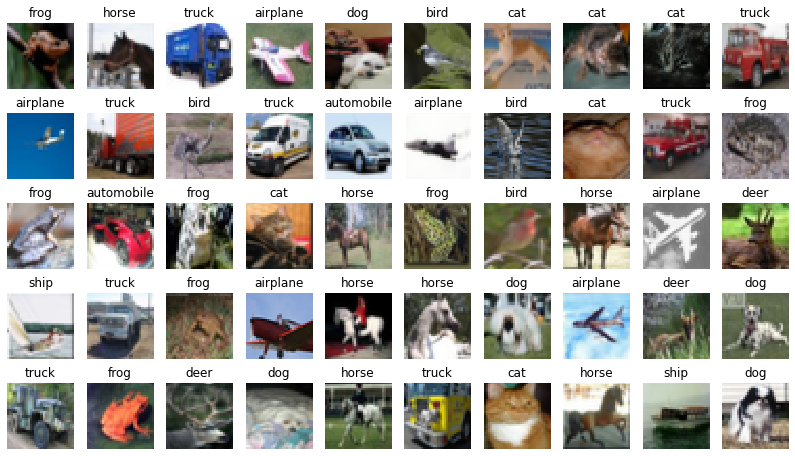

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

mean = np.mean(X_train, axis=0)
standard_deviation = np.std(X_train, axis=0)

X_train = (X_train - mean) / standard_deviation
X_valid = (X_valid - mean) / standard_deviation
X_test = (X_test - mean) / standard_deviation

#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32, 3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 14s 7ms/step - loss: 1.4732 - accuracy: 0.4864 - val_loss: 1.2598 - val_accuracy: 0.5532
Epoch 2/10
352/352 [==============================] - 3s 8ms/step - loss: 1.1531 - accuracy: 0.6009 - val_loss: 1.1079 - val_accuracy: 0.6168
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0290 - accuracy: 0.6438 - val_loss: 1.0525 - val_accuracy: 0.6394
Epoch 4/10
352/352 [==============================] - 2s 4ms/step - loss: 0.9544 - accuracy: 0.6718 - val_loss: 1.0623 - val_accuracy: 0.6366
Epoch 5/10
352/352 [==============================] - 2s 4ms/step - loss: 0.8995 - accuracy: 0.6911 - val_loss: 1.0151 - val_accuracy: 0.6518
Epoch 6/10
352/352 [==============================] - 2s 4ms/step - loss: 0.8623 - accuracy: 0.7064 - val_loss: 1.0203 - val_accuracy: 0.6508
Epoch 7/10
352/352 [==============================] - 2s 4ms/step - loss: 0.8335 - accuracy: 0.7142 - val_loss: 1.0112 - val_accuracy: 0.6570
Epoch

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 1s - loss: 1.0532 - accuracy: 0.6484 - 639ms/epoch - 2ms/step
accuracy: 64.84%


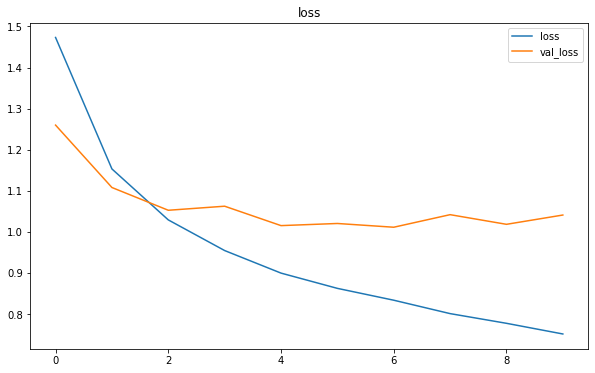

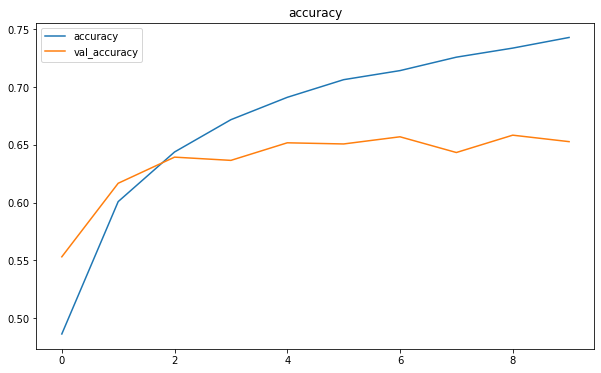

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

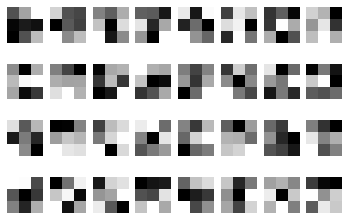

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1. The number of parameters (trainable weights) of a Convolutional Layer (Conv2D) is determined by the size of the used kernel, the number of feature maps in output (each feature map has is own kernel learned during training), the number of input channels and the bias terms.   
We can calculate the number of parameters of a convolutional layer with the following formula:  

  * n_output_feature_maps ⋅ (n_input_channels ⋅ kernel_height ⋅ kernel_width + 1)

  The +1 in the formula is the bias term. So we have:
  * First Conv2D layer:  
  3 input channels (RGB), kernel size 3x3, 32 output feature maps  
  Number of parameters: 32 ⋅ (3 ⋅ 3 ⋅ 3 + 1) = 896
  * Second Conv2D layer:  
  32 input channels (feature maps created by the previous Conv2D layer), kernel size 2x2, 16 output feature maps  
  Number of parameters: 16 ⋅ (32 ⋅ 2 ⋅ 2 + 1) = 2064
2. The two convolutional layers have a different number of parameters because they present different kernel sizes and a different number of input/output channels. Those differences were already shown in the previous answer. 

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 3s 6ms/step - loss: 1.6024 - accuracy: 0.4282 - val_loss: 1.3358 - val_accuracy: 0.5266
Epoch 2/10
352/352 [==============================] - 2s 5ms/step - loss: 1.2868 - accuracy: 0.5472 - val_loss: 1.2233 - val_accuracy: 0.5716
Epoch 3/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1811 - accuracy: 0.5878 - val_loss: 1.1544 - val_accuracy: 0.5964
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 1.1075 - accuracy: 0.6129 - val_loss: 1.0886 - val_accuracy: 0.6274
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0465 - accuracy: 0.6375 - val_loss: 1.0447 - val_accuracy: 0.6364
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 1.0094 - accuracy: 0.6500 - val_loss: 1.0193 - val_accuracy: 0.6458
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 0.9807 - accuracy: 0.6628 - val_loss: 0.9984 - val_accuracy: 0.6550
Epoch 

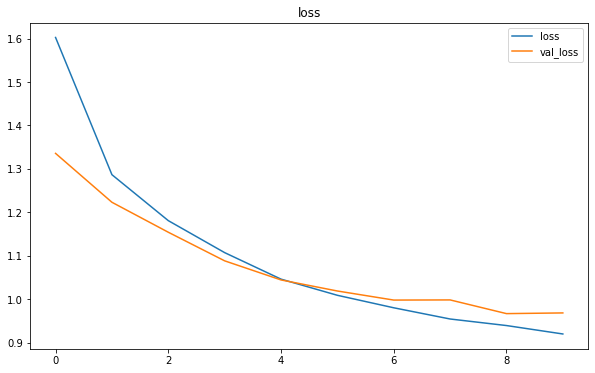

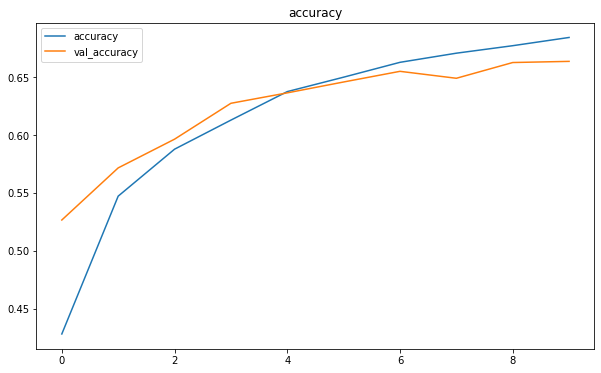

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32, 3]),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3200)             

Epoch 1/25
352/352 [==============================] - 4s 10ms/step - loss: 1.6069 - accuracy: 0.4077 - val_loss: 1.3188 - val_accuracy: 0.5160
Epoch 2/25
352/352 [==============================] - 3s 9ms/step - loss: 1.2428 - accuracy: 0.5563 - val_loss: 1.1438 - val_accuracy: 0.6116
Epoch 3/25
352/352 [==============================] - 3s 8ms/step - loss: 1.0846 - accuracy: 0.6183 - val_loss: 0.9938 - val_accuracy: 0.6546
Epoch 4/25
352/352 [==============================] - 3s 8ms/step - loss: 0.9860 - accuracy: 0.6533 - val_loss: 0.8912 - val_accuracy: 0.6980
Epoch 5/25
352/352 [==============================] - 3s 8ms/step - loss: 0.9097 - accuracy: 0.6813 - val_loss: 0.8355 - val_accuracy: 0.7026
Epoch 6/25
352/352 [==============================] - 3s 9ms/step - loss: 0.8554 - accuracy: 0.7015 - val_loss: 0.7896 - val_accuracy: 0.7346
Epoch 7/25
352/352 [==============================] - 3s 10ms/step - loss: 0.8079 - accuracy: 0.7182 - val_loss: 0.7505 - val_accuracy: 0.7444
Epoc

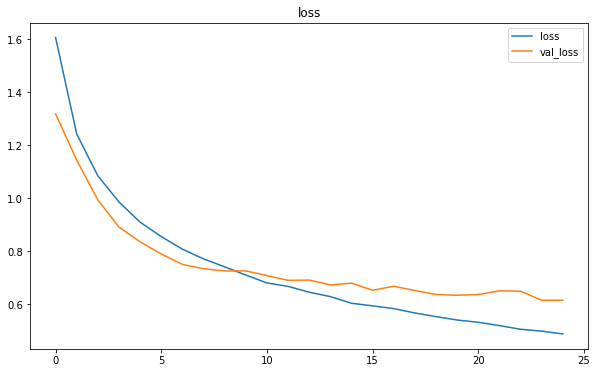

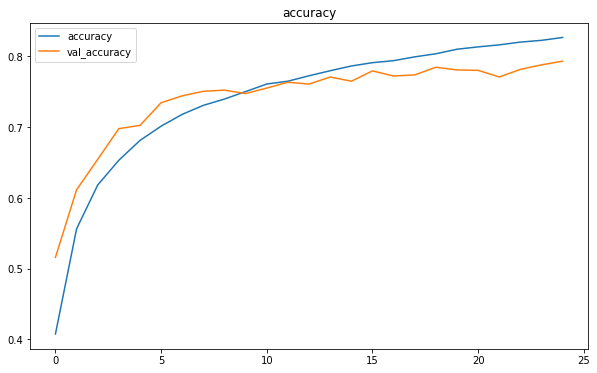

In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### Tests Discussion:
The best model that I found has the following architecture:
* Conv2D layer (32 filters, 3x3 kernel, ReLU activation function)
* MaxPool2D with 2x2 pool size
* Conv2D layer (__64 filters__, 3x3 kernel, ReLU activation function)
* Conv2D layer (__128 filters__, 3x3 kernel, ReLU activation function)
* MaxPool2D with 2x2 pool size
* Flatten layer
* __Dropout layer__ with rate __0.6__
* __Dense layer__ with __32 units__ and ReLU activation function
* Dense layer (output layer) with 10 units and softmax activation

I used the Adam optimizer, 25 epochs and a batch size of 128.  
The achieved accuracy in the test set is 78.20% with a loss value of 0.6525. 

I arrived at this architecture after trying different reparameterization, and by combining together the most promising design choices.  

The main change from the previous architectures is the presence of 2 consecutive Conv2D layers with many filters (respectively 64 and 128), followed by only one MaxPool2D layer (no MaxPool2D between the 2 Conv2D layers).  
Due to the higher number of filters (and consequentely of parameters) I also added a Dropout layer, in order to avoid overfitting.  
Finally the addition of another dense layer with 32 units (that comes before the output layer) seemed to improve the model performances.  
The increased number of epochs was necessary to let the model reach an acceptable performance.


Besides, I tested also other models. All the following models presents the same architecture of the previous exercise (DeepCNN), __with only one aspect in the network changed from the original version__, while the rest of the parameters stayed the same.

I will report the __changed aspect__, the performance metrics and a brief discussion:

*   __number of layers__: increased number of layers  
    I added a Conv2D layer, with the same configuration of the first one, followed by a MaxPool2D layer with 2x2 pool size.  
    This configuration led to worst performances. The reason is that the network has more parameters, but there were not enough epochs to learn them (this is clear by looking at the loss and accuracy plots).    
    Results:  loss: 1.1416 - accuracy: 0.6005
*   __number of filters__: increased number of output feature maps of Conv2D layers  
    I increase the number of filters (and so the number of output feature maps) of both Conv2D layers to 64 (from 32 and 16). This lead to a significant improvement in performances. The additional filters have learned to recognise useful patterns during training, halping the model in the classification task.  
    Results:  loss: 0.8780 - accuracy: 0.7054
*   __kernel dimension__: increased kernel dimension  
    I used a kernel size of 6x6 in the first Conv2D layer and a kernel of size 5x5 in the second one. Also in this case the performance decreases can be explained by the higher number of parameters with not enough epochs to learn them.  
    In this specific task, on the CIFAR-10 dataset, I think that is better to avoid the usage of big kernels. They increase the number of parameters to be learned but also lead to an higher loss of information (compared with smaller kernels) in a task on images with a relatively low dimensionality (32x32 pixels color images).  
    Results:  loss: 1.0806 - accuracy: 0.6268
*   __activation function__: changed the activation function of all the layers that required one (except the last one that mantain the softmax)  
    I used the __tanh__ instead of the ReLU. There was not a huge difference in performances with this change, but the model with the ReLU performs slightely better. The tanh could still represent a suitable alternative.  
    Results:  loss: 0.9865 - accuracy: 0.6531
*   __epochs__: increased number of epochs  
    I set the number of epochs to 100 (with the original one at 10).  
    This number of epochs was deliberately too high, leading the model to overfit. But in general, increasing the number of epochs seems to be a good approach that can bring deacent results improvements even on very simple model.  
    Results:  loss: 0.9598 - accuracy: 0.6846
*   __batch size__: reduced batch size  
    I reduced the batch size to 64 (from 128), since by some empirical evidences seems that too large mini-batch size usually leads to a lower accuracy. However here there was not significant gain in accuracy.   
    Results:  loss: 0.9793 - accuracy: 0.6680
*   __optimizer__: changed the optimizer  
    I changed the optimizer, from adam to sgd.  
    The sgd optimizer seems to be too slow to find a good minimum in just 10 epochs, this lead to significantely worst performances.  
    Results:  loss: 1.2880 - accuracy: 0.5407
*   __removed max-pooling__: removed the MaxPool2D layers  
    I removed the max-pooling layers from the model. The goal of pooling layers is to subsamples the input image (or feature maps). By removing them the model clearly overfit, due to the high number of parmeters (this was clear by looking at the training loss and accuracy curves). They are definitely useful to counter-balance the Conv2D action of introucing feature maps.  
    Results:  loss: 1.3308 - accuracy: 0.6007
*   __increasing pool size__: increase pool size of MaxPool2D layers  
    I increased the pool size from 2x2 to 3x3. This led to a decrease in performances, because the network through the subsampling action of those pooling layers, ends up loosing too much useful informations.    
    Results:  loss: 1.1042 - accuracy: 0.6152